In [1]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats


/tmp/ipykernel_745/1937311913.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_turb = pd.concat([all_turb, df], ignore_index=True)


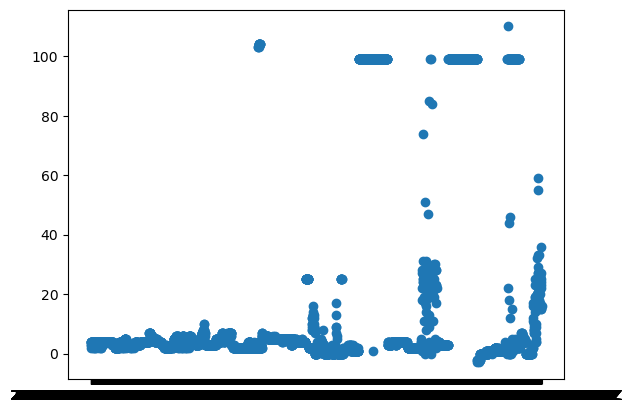

In [26]:
# figure out how to do this easily for 1 site (ndbc)

FF = glob.glob('data/data_gov-ndbc*.csv')
FF.sort()
all_turb = pd.DataFrame(data=None,
                        columns=['time','lat','lon','z','turb'],
                        )
for jj in range(len(FF)):
    df_full = pd.read_csv(FF[jj],
                     header=0) #

    df = pd.DataFrame(data=None,
                        columns=['time','lat','lon','z','turb'],
                        )
    df['time'] = df_full['time (UTC)']
    df['lat'] = df_full['latitude (degrees_north)']
    df['lon'] = df_full['longitude (degrees_east)']
    df['z'] = df_full['depth_reading (m)']
    df['turb'] = df_full['sea_water_turbidity (NTU)']
    df = df[df['z']<2]
    all_turb = pd.concat([all_turb, df], ignore_index=True)


all_turb = all_turb.dropna(axis='index')
all_turb.reset_index(drop=True, inplace=True)

plt.plot(all_turb['time'],all_turb['turb'],'o')
all_turb.to_csv('results/ndbc_turb.csv')


data/data_E01_waves_mstrain_all_2018-10-24 13:28:38+00:00.csv


/tmp/ipykernel_745/1631083876.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_turb = pd.concat([all_turb, df], ignore_index=True)
/tmp/ipykernel_745/1631083876.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_turb = pd.concat([all_turb, df], ignore_index=True)


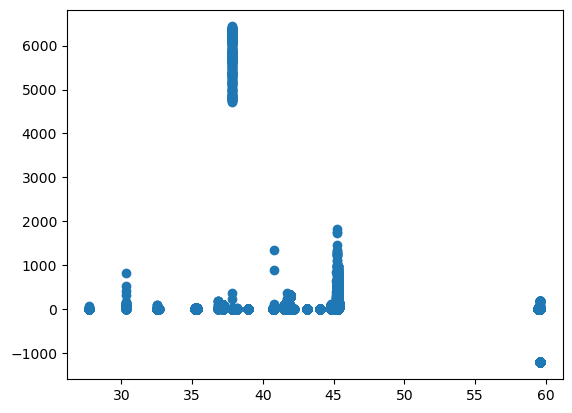

In [39]:
FF = glob.glob('data/data_*.csv')
FF.sort()
all_turb = pd.DataFrame(data=None,
                        columns=['time','lat','lon','z','turb'],
                        )

for jj in range(len(FF)):
    df_full = pd.read_csv(FF[jj],header=0)

    
    df = pd.DataFrame(data=None,
                        columns=['time','lat','lon','z','turb'],
                        )
    # try loading each file
    df['time'] = df_full['time (UTC)']
    df['lat'] = df_full['latitude (degrees_north)']
    df['lon'] = df_full['longitude (degrees_east)']
    
    # check for various names for depth column
    if 'depth (m)' in df_full.columns:
        df['z'] = df_full['depth (m)']  
    elif 'z (m)' in df_full.columns:
        df['z'] = df_full['z (m)']
    elif 'depth_reading (m)' in df_full.columns:
        df['z'] = df_full['depth_reading (m)']
    else:
        print(FF[jj])

    # check for various names for turbidity column
    if 'turbidity (ntus)' in df_full.columns:
        df['turb'] = df_full['turbidity (ntus)']  
    elif 'sea_water_turbidity (NTU)' in df_full.columns:
        df['turb'] = df_full['sea_water_turbidity (NTU)']
    elif 'sea_water_turbidity (RFU)' in df_full.columns:
        df['turb'] = df_full['sea_water_turbidity (RFU)']
    else:
        print(FF[jj])
       
    
    df = df[df['z']<2]
    
    all_turb = pd.concat([all_turb, df], ignore_index=True)


all_turb = all_turb.dropna(axis='index')
all_turb.reset_index(drop=True, inplace=True)
all_turb.to_csv('results/all_turbidity_compile.csv')
plt.plot(all_turb['lat'],all_turb['turb'],'o')
